<a href="https://colab.research.google.com/github/ddesai-sjsu/Data-Mining/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links)

You need to showcase 

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

 


 



# **1) Image Dataset**

The dataset used is Olivetti_Faces from https://www.openml.org/d/41083

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). 

All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms. 

 The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.  
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap



plt.style.use('ggplot')

In [2]:
from sklearn.datasets import fetch_openml
db = fetch_openml(name='Olivetti_Faces')
db.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]])

In [3]:
df=pd.DataFrame(data=db.data, columns=db.feature_names)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel4057,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,...,0.756198,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,...,0.673554,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,...,0.719008,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,...,0.400826,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830578,0.830578,0.842975,0.838843,0.838843,0.838843,0.830578,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0.797521,0.801653,0.793388,0.793388,...,0.561983,0.557

In [4]:
X = df.values
y = db.target

In [5]:
X=X[0:100]
y=y[0:100]

In [6]:
import matplotlib.pyplot as plt
import matplotlib

from skimage import data
images = data.stereo_motorcycle()

In [7]:
import numpy as np

In [32]:
y = y.astype(np.int)

In [8]:
X_scaled = MinMaxScaler().fit_transform(X)

## **PCA**

In [9]:
pca = PCA(random_state=2020)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_recovered = pca.inverse_transform(X_pca)

In [10]:
pca_98 = PCA(n_components=0.98, random_state=2020)
pca_98.fit(X_scaled)
X_pca_98 = pca_98.transform(X_scaled)
X_pca_98.shape

(100, 68)

In [12]:
X_recovered = pca_98.inverse_transform(X_pca_98)

In [13]:
def plot_me(data, title):
  figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
  for img, ax in zip(data, axis.ravel()):
    ax.imshow(img.reshape((64, 64)), cmap="Greys")
    ax.axis("off")
  figure.suptitle(title, fontsize=24)

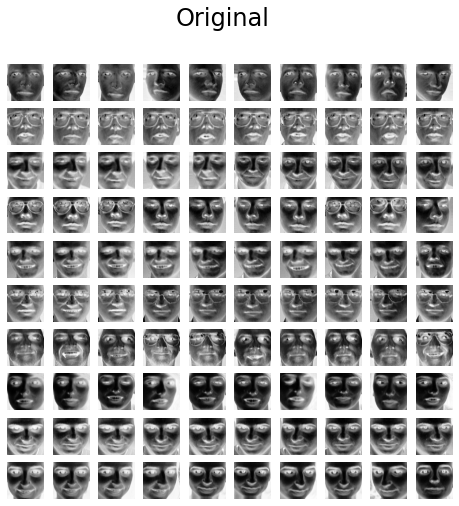

In [14]:
plot_me(X,'Original')

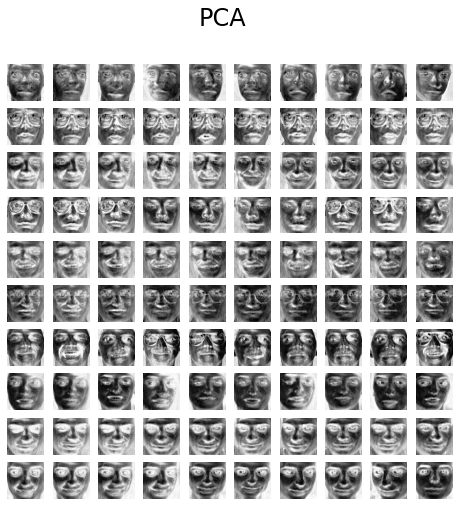

In [15]:
plot_me(X_recovered,'PCA')

## **SVD**

In [16]:
svd = TruncatedSVD(n_components=255, algorithm='randomized', n_iter=10,
                   random_state=2020)
X_svd= svd.fit_transform(X_scaled)

In [17]:
def find_svd(cumulative,num=0.90):
  for index, val in enumerate(cumulative):
    if val > num:
      break;
  return index + 1;

In [18]:

components = find_svd(np.cumsum(svd.explained_variance_ratio_))
components

32

In [19]:
svd_35= TruncatedSVD(n_components=35, algorithm='randomized', n_iter=10,
                   random_state=2020)
svd_35.fit(X_scaled)
X_svd_35 = svd_35.transform(X_scaled)
X_svd_35.shape

(100, 35)

In [20]:
X_svd_recovered = svd_35.inverse_transform(X_svd_35)

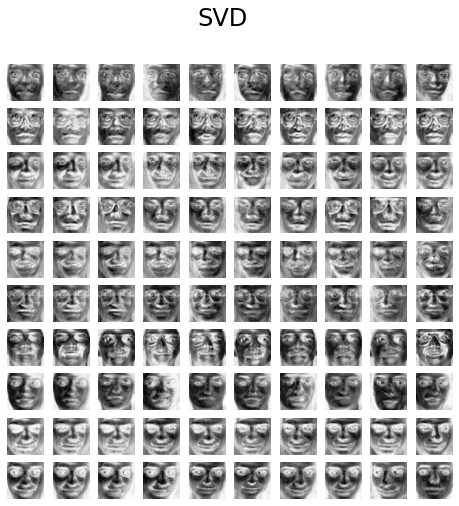

In [21]:
plot_me(X_svd_recovered, "SVD")


## **TSNE**

In [29]:
tsne= TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)

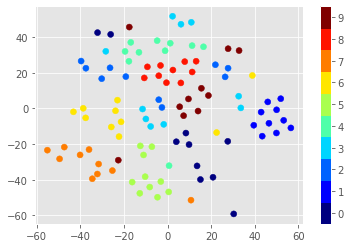

In [34]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], cmap=plt.cm.get_cmap('jet', 10),c=y)
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

## **ISOMAP**

In [36]:
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

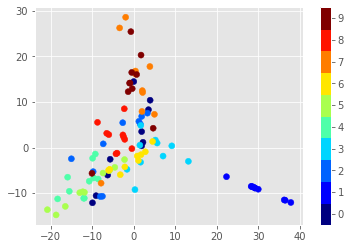

In [37]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

## **LLE**

In [38]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)

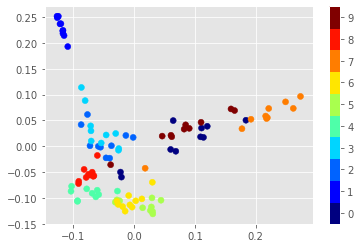

In [39]:
plt.scatter(X_lle[:,0], X_lle[:,1], c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

## **UMAP**

In [40]:

!pip install scprep phate umap-learn umap-learn[plot]

     |████████████████████████████████| 104 kB 38.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 416 kB 56.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 1.8 MB 21.2 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
     |████████████████████████████████| 15.8 MB 652 bytes/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
     |████████████████████████████████| 132 kB 57.6 MB/s 
     |████████████████████████████████| 793 kB 46.6 MB/s 
     |████████████████████████████████| 793 kB 50.7 MB/s 
     |████████████████████████████████| 791 kB 50.9 MB/s 
     |████████████████████████████████| 786 kB 41.0 MB/s 
     |████████████████████████████████| 779 kB 48.4 MB/s 
     |████████████████████████████████| 778 kB 58.2 MB/s 
     |████████████████████████████████| 776 kB 48.1 MB/s 
     |████████████████████████████████| 769 kB 72.7 MB/s 
     |███████████

In [41]:
import umap
import umap.plot
umap1 = umap.UMAP()

In [42]:
X_umap = umap1.fit_transform(X_pca)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


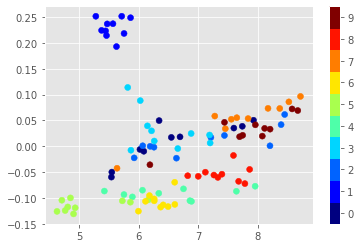

In [43]:
plt.scatter(X_umap[:,0], X_lle[:,1], c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

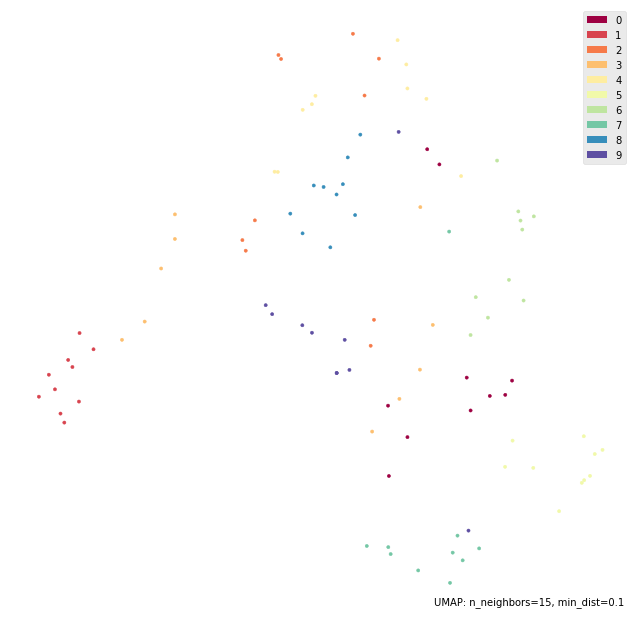

In [44]:
umap.plot.points(umap1.fit(X_pca), labels=y);

# **2) Tabular Dataset**

Breast cancer dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [45]:
from sklearn.datasets import load_breast_cancer
db = fetch_openml(name='flags')

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name flags exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [46]:
df = pd.DataFrame(data=db.data, columns=db.feature_names)

In [47]:
df

,1landmass,2zone,3area,population,language,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,4.0,0.0,648.0,16.0,9.0,0.0,3.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
1,2.0,0.0,29.0,3.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
2,3.0,0.0,2388.0,20.0,7.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,7.0
3,5.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0
4,2.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,5.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
190,2.0,0.0,256.0,22.0,5.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
191,3.0,1.0,905.0,28.0,9.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,4.0
192,3.0,1.0,753.0,6.0,9.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0


In [48]:
X = df.values
y = db.target

In [49]:
#standartize the features
scaler = StandardScaler()
#calculate mean and standart deviation
scaler.fit(X)
#get scaled values
X_scaled = scaler.transform(X)

## **PCA**

In [50]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca= pca.transform(X_scaled)

In [51]:
pca_df = pd.DataFrame(data = X_pca
             , columns = ['component 1', 'component 2'])

In [52]:
pca_df.head()

,component 1,component 2
0,-0.113081,-2.335358
1,-0.588016,-2.024217
2,-2.274462,-0.563523
3,2.403814,-1.304693
4,-1.194634,-0.567104


In [53]:
pca_99 = PCA(n_components=0.90)
pca_99.fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)

In [54]:
pca_df_99 = pd.DataFrame(data = X_pca_99)

In [55]:
df

,1landmass,2zone,3area,population,language,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,4.0,0.0,648.0,16.0,9.0,0.0,3.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
1,2.0,0.0,29.0,3.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
2,3.0,0.0,2388.0,20.0,7.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,7.0
3,5.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0
4,2.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,5.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
190,2.0,0.0,256.0,22.0,5.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
191,3.0,1.0,905.0,28.0,9.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,4.0
192,3.0,1.0,753.0,6.0,9.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0


In [56]:
pca_df_99

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.113081,-2.335358,0.016688,-2.046784,1.082743,-0.627195,-0.191459,-0.781951,0.765391,0.863616,0.101056,0.854659,-0.413461,0.584136,0.479507,-1.335640,0.121129,-1.315486,-0.626455
1,-0.588016,-2.024217,-0.222926,0.880602,0.171356,-0.678541,-1.234578,-0.073897,0.759843,-0.694718,-0.052957,-0.964939,-0.174177,-0.441189,-2.362167,-0.305871,0.061938,0.919232,-0.666415
2,-2.274462,-0.563523,-1.634306,0.345129,-1.191825,0.923776,0.155572,2.381195,-0.324817,1.749662,-0.220798,1.279055,0.396963,2.508093,0.153490,0.326798,-0.114819,-0.727279,-0.087972
3,2.403814,-1.304693,0.935994,-0.892820,0.552985,0.157830,0.858202,1.163973,0.917461,-1.360313,-0.455954,0.539364,3.872151,-0.768884,-0.756749,0.745898,0.157456,-1.059803,0.621231
4,-1.194634,-0.567104,1.293621,0.746847,-0.723168,1.353639,-0.595733,0.504861,2.978582,-0.204913,0.381085,0.831804,0.220026,-0.323765,0.502082,0.656368,-0.228316,0.687221,0.056597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-0.291803,2.439916,-0.543597,0.614936,0.762959,-0.757742,0.164349,1.182287,1.151546,0.503727,0.155414,1.604164,0.278684,-1.542711,-0.452263,-0.471928,0.308543,-0.040507,-0.321954
190,-0.876879,0.368601,0.317641,-0.115546,0.825723,-0.794718,0.972823,-0.254084,1.685522,0.280495,-0.336726,0.201199,0.562921,-0.403084,0.309038,0.280645,-0.296134,-0.070684,-0.682874
191,1.345108,-3.214462,-1.284999,-0.348658,-0.027183,1.458201,0.303630,0.185762,0.434618,0.131879,1.544684,-1.832478,0.856519,-1.144835,-0.561533,0.071734,0.601155,-1.141295,0.634361
192,0.230202,-2.973528,0.194158,-0.363180,-1.563761,1.473256,-0.550613,-0.387524,-0.607124,0.186934,2.732993,1.272780,0.470290,0.031967,-1.482132,-0.182210,0.109116,1.189455,0.629728


## **SVD**

In [57]:
svd = TruncatedSVD(n_components=20, algorithm='randomized',
                   random_state=2020)

X_svd = svd.fit_transform(X_scaled)

In [58]:
svd_df = pd.DataFrame(data = X_svd)

In [59]:
svd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.113081,-2.335358,0.016688,-2.046784,1.082743,-0.627195,-0.191459,-0.781951,0.765391,0.863616,0.101056,0.854659,-0.413461,0.584136,0.479507,-1.335640,0.121129,-1.315486,-0.626455,-0.507601
1,-0.588016,-2.024217,-0.222926,0.880602,0.171356,-0.678541,-1.234578,-0.073897,0.759843,-0.694718,-0.052957,-0.964939,-0.174177,-0.441189,-2.362167,-0.305871,0.061938,0.919232,-0.666415,0.651731
2,-2.274462,-0.563523,-1.634306,0.345129,-1.191825,0.923776,0.155572,2.381195,-0.324817,1.749662,-0.220798,1.279055,0.396963,2.508093,0.153490,0.326798,-0.114819,-0.727279,-0.087972,0.439658
3,2.403814,-1.304693,0.935994,-0.892820,0.552985,0.157830,0.858202,1.163973,0.917461,-1.360313,-0.455954,0.539364,3.872151,-0.768884,-0.756749,0.745898,0.157456,-1.059803,0.621231,-1.156198
4,-1.194634,-0.567104,1.293621,0.746847,-0.723168,1.353639,-0.595733,0.504861,2.978582,-0.204913,0.381085,0.831804,0.220026,-0.323765,0.502082,0.656368,-0.228316,0.687221,0.056597,0.738183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-0.291803,2.439916,-0.543597,0.614936,0.762959,-0.757742,0.164349,1.182287,1.151546,0.503727,0.155414,1.604164,0.278684,-1.542711,-0.452263,-0.471928,0.308543,-0.040507,-0.321954,-1.391912
190,-0.876879,0.368601,0.317641,-0.115546,0.825723,-0.794718,0.972823,-0.254084,1.685522,0.280495,-0.336726,0.201199,0.562921,-0.403084,0.309038,0.280645,-0.296134,-0.070684,-0.682874,0.679240
191,1.345108,-3.214462,-1.284999,-0.348658,-0.027183,1.458201,0.303630,0.185762,0.434618,0.131879,1.544684,-1.832478,0.856519,-1.144835,-0.561533,0.071734,0.601155,-1.141295,0.634361,0.414503
192,0.230202,-2.973528,0.194158,-0.363180,-1.563761,1.473256,-0.550613,-0.387524,-0.607124,0.186934,2.732993,1.272780,0.470290,0.031967,-1.482132,-0.182210,0.109116,1.189455,0.629728,1.159540


## **TSNE**

In [60]:
tsne = TSNE(n_components=3, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

In [61]:
tsne_df = pd.DataFrame(data = X_tsne)
tsne_df

,0,1,2
0,-153.886963,80.382652,31.237307
1,40.538002,-62.840271,-8.322785
2,-40.478142,132.118073,56.112617
3,-6.473417,-152.967163,-16.684330
4,-42.587418,65.878746,-110.532303
...,...,...,...
189,-22.814951,11.386312,125.282715
190,9.022878,64.480339,-75.195847
191,-1.168662,-79.585419,-203.261429
192,52.704746,-67.675217,54.779808


## **ISOMAP**

In [62]:
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X_scaled)

In [63]:
isomap_df = pd.DataFrame(data = X_isomap)
isomap_df

,0,1
0,-5.419055,-1.516783
1,-5.907762,-2.084707
2,0.945206,22.107839
3,-2.878494,-2.121159
4,-3.883122,-2.016965
...,...,...
189,4.777796,1.392436
190,2.136268,2.107461
191,-7.312612,-2.707512
192,-7.731473,-3.891652


## **LLE**

In [64]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)

In [65]:
lle_df = pd.DataFrame(data = X_isomap)
lle_df

,0,1
0,-5.419055,-1.516783
1,-5.907762,-2.084707
2,0.945206,22.107839
3,-2.878494,-2.121159
4,-3.883122,-2.016965
...,...,...
189,4.777796,1.392436
190,2.136268,2.107461
191,-7.312612,-2.707512
192,-7.731473,-3.891652


## **UMAP**

In [67]:
umap_model = umap.UMAP()
X_umap = umap_model.fit_transform(X_pca)

In [68]:
X_umap = pd.DataFrame(data = X_umap)
X_umap

,0,1
0,4.411247,8.110520
1,4.752762,8.864197
2,9.040517,11.091135
3,5.447127,5.356436
4,7.848413,9.439892
...,...,...
189,13.799030,7.851652
190,9.147854,8.389538
191,4.101315,7.149111
192,3.989742,7.620983


In [69]:
umap_model2 = umap.UMAP(n_neighbors=10,
                      min_dist=0.2,
                      metric='correlation')
X_umap2 = umap_model2.fit(X_pca)

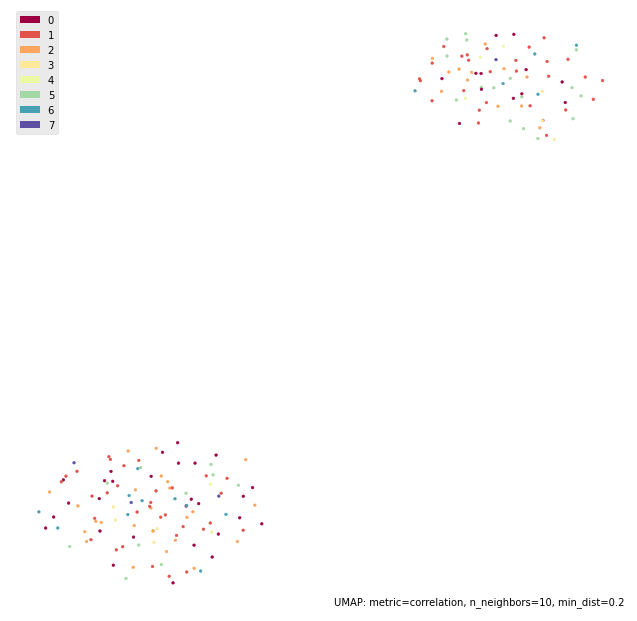

In [70]:
umap.plot.points(X_umap2, labels=y);